# 여행 상품 신청 여부 예측 경진대회
https://dacon.io/competitions/official/235959/data

### ~8/21
EDA (이상치,결측치 처리)

<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<br>

### <컬럼 확인>

**train 데이터**<br>

id : 샘플 아이디<br>
Age : 나이<br>
TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)<br>
CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) <br>
DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간<br>
Occupation : 직업<br>
Gender : 성별<br>
NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원 **여행인원수**<br>
NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수<br>
ProductPitched : 영업 사원이 제시한 상품<br>
PreferredPropertyStar : 선호 호텔 숙박업소 등급<br>
MaritalStatus : 결혼여부<br>
NumberOfTrips : 평균 연간 여행 횟수<br>
Passport : 여권 보유 여부 (0: 없음, 1: 있음)<br>
PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도<br>
OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)<br>
NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수<br>
Designation : (직업의) 직급<br>
MonthlyIncome : 월 급여<br>
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함) → test데이터에는 없음




**sample_submission.csv : 제출 양식**<br>
id : 샘플 아이디<br>
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1955.0,978.000000,564.504207,1.0,489.5,978.0,1466.5,1955.0
Age,1861.0,37.462117,9.189948,18.0,31.0,36.0,43.0,61.0
CityTier,1955.0,1.641432,0.908744,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,1853.0,15.524015,8.150057,5.0,9.0,14.0,20.0,36.0
NumberOfPersonVisiting,1955.0,2.922762,0.712276,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,1942.0,3.718332,1.004095,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,1945.0,3.568638,0.793196,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,1898.0,3.255532,1.814698,1.0,2.0,3.0,4.0,19.0
Passport,1955.0,0.291049,0.454362,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,1955.0,3.067519,1.372915,1.0,2.0,3.0,4.0,5.0


<br>

### <결측치 처리>

In [5]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

<br>

1. *Age 나이* → **평균**으로 채우기<br>
결측치 수 : 94

In [6]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

<br>

2. *TypeofContact 고객의 제품인지 방법* → **unknown**으로 채우기<br>
결측치 수 : 10<br>
>스스로 검색 1379<br>
>회사 홍보 566

In [7]:
train['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

In [8]:
train['TypeofContact'].fillna('unknown', inplace=True)

<br>

3. *DurationOfPitch 영업 사원이 고객에게 제공하는 프레젠테이션 기간* → **평균에서 내림**으로 채우기<br>
결측치 수 : 102

In [9]:
print("최빈값 :",train['DurationOfPitch'].mode(),"\n","평균 :", train['DurationOfPitch'].mean())

최빈값 : 0    9.0
dtype: float64 
 평균 : 15.524015110631408


In [10]:
train['DurationOfPitch'].fillna(15, inplace=True)

<br>

4. *NumberOfFollowups 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수* → **최빈값**으로 채우기<br>
결측치 수 : 13

In [11]:
print("최빈값 :",train['NumberOfFollowups'].mode(),"\n","평균 :", train['NumberOfFollowups'].mean())

최빈값 : 0    4.0
dtype: float64 
 평균 : 3.718331616889804


In [12]:
train['NumberOfFollowups'].fillna(4, inplace=True)

<br>

5. *PreferredPropertyStar 선호 호텔 숙박업소 등급* → **최빈값**으로 채우기<br>
결측치 수 : 10

In [13]:
print("최빈값 :",train['PreferredPropertyStar'].mode(),"\n","평균 :", train['PreferredPropertyStar'].mean())

최빈값 : 0    3.0
dtype: float64 
 평균 : 3.568637532133676


In [14]:
train['PreferredPropertyStar'].fillna(3, inplace=True)

<br>

6. *NumberOfTrips 평균 연간 여행 횟수* → **평균에서 내림**으로 채우기<br>
결측치 수 : 57

In [15]:
print("최빈값 :",train['NumberOfTrips'].mode(),"\n","평균 :", train['NumberOfTrips'].mean())

최빈값 : 0    2.0
dtype: float64 
 평균 : 3.255532139093783


In [16]:
train['NumberOfTrips'].fillna(3, inplace=True)

<br>

7. *NumberOfChildrenVisiting 함께 여행을 계획 중인 5세 미만의 어린이 수* → **최빈값**으로 채우기<br>
결측치 수 : 27

In [17]:
print("최빈값 :",train['NumberOfChildrenVisiting'].mode(),"\n","평균 :", train['NumberOfChildrenVisiting'].mean())

최빈값 : 0    1.0
dtype: float64 
 평균 : 1.213174273858921


In [18]:
train['NumberOfChildrenVisiting'].fillna(1, inplace=True)

<br>

8. *MonthlyIncome 월 급여* → **평균**으로 채우기<br>
결측치 수 : 100

In [19]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean(), inplace=True)

<br>

<결측치><br>
>**평균** : Age, MonthlyIncome<br>
>**평균에서 내림(정수)** : DurationOfPitch, NumberOfTrips<br>
>**최빈값(정수)** : NumberOfFollowups, PreferredPropertyStar, NumberOfChildrenVisiting<br>
>**unknown** : TypeofContact

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

<br>
<br>

### <이상치 처리>
(결측치 처리 후)

<AxesSubplot:>

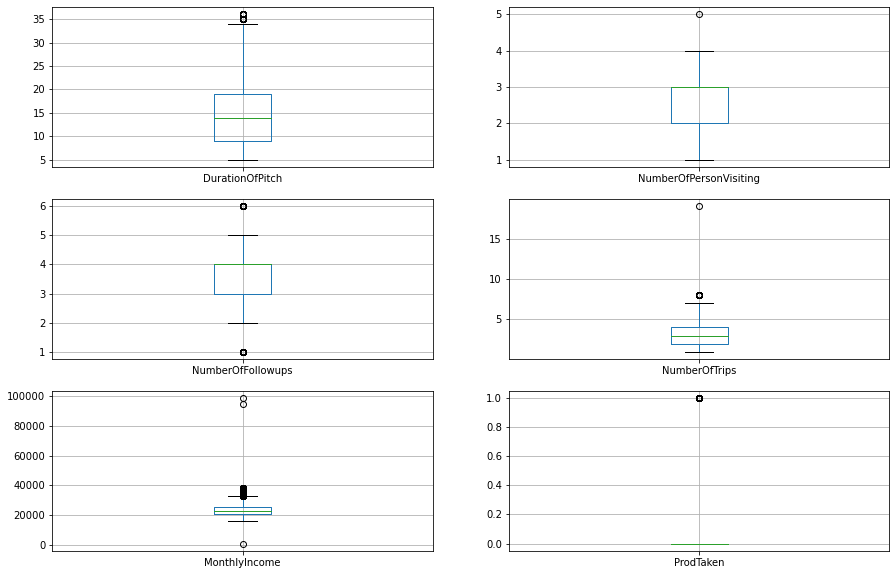

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

ax = axes.flatten()

train[['DurationOfPitch']].boxplot(ax=ax[0])
train[['NumberOfPersonVisiting']].boxplot(ax=ax[1])
train[['NumberOfFollowups']].boxplot(ax=ax[2])
train[['NumberOfTrips']].boxplot(ax=ax[3])
train[['MonthlyIncome']].boxplot(ax=ax[4])
train[['ProdTaken']].boxplot(ax=ax[5])

In [22]:
# 이상치 탐지 함수
def outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return (lower_bound, upper_bound, np.where((data>upper_bound)|(data<lower_bound)))

1. *DurationOfPitch 영업 사원이 고객에게 제공하는 프레젠테이션 기간* → **처리X**<br>
이상치 수 : 44개

In [23]:
len(outliers(train['DurationOfPitch'])[2][0])

44

<br>

2. *NumberOfPersonVisiting 고객과 함께 여행을 계획 중인 총 인원(여행인원수)* → **처리X**<br>
이상치 수 : 1개

In [24]:
len(outliers(train['NumberOfPersonVisiting'])[2][0])

1

<br>

3. *NumberOfFollowups 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수* → **처리X**<br>
이상치 수 : 120개

In [25]:
len(outliers(train['NumberOfFollowups'])[2][0])

121

In [26]:
len(train[train['NumberOfFollowups']>=6])

47

In [27]:
len(train[train['NumberOfFollowups']<=1])

74

<br>

4. *NumberOfTrips 평균 연간 여행 횟수* → **제일 큰 이상치 제거**<br>
이상치 수 : 38개

In [28]:
len(outliers(train['NumberOfTrips'])[2][0])

38

In [29]:
len(train[train['NumberOfTrips']>15])

1

In [30]:
len(train[(train['NumberOfTrips']>7)&(train['NumberOfTrips']<10)])

37

In [31]:
###제일 큰 이상치 제거
train = train.drop(train[train['NumberOfTrips']>15].index)

<br>

5. *MonthlyIncome 월 급여* → **제일 크거나 작은 이상치 제거**<br>
이상치 수 : 144개

In [32]:
len(outliers(train['MonthlyIncome'])[2][0])

148

In [33]:
print("lower bound =", outliers(train['MonthlyIncome'])[0],"\n", "upper bound =", outliers(train['MonthlyIncome'])[1])

lower bound = 13358.5 
 upper bound = 32628.5


In [34]:
len(train[train['MonthlyIncome']>=80000])  ##삭제

2

In [35]:
len(train[(train['MonthlyIncome']>32645.75)&(train['MonthlyIncome']<80000)])

142

In [36]:
len(train[train['MonthlyIncome']<=13327.75])  ##삭제

1

In [37]:
###제일 큰 & 작은 이상치 제거
train = train.drop(train[train['MonthlyIncome']>=80000].index)
train = train.drop(train[train['MonthlyIncome']<=13327.75].index)

<br>

6. *ProdTaken 평균 연간 여행 횟수* → **예측해야 할 변수이므로 처리X**<br>

<br>
<br>

### <문자형 변수 처리>
예측모델을 사용하기 때문에 모두 더미변수로 변경

In [38]:
train = pd.get_dummies(train, columns = ['TypeofContact', 'Occupation','Gender',
                                         'ProductPitched','MaritalStatus','Designation'])

<br>

### <id 제거>

In [39]:
train = train.drop(columns=['id'])

<br>

### <test에도 동일하게 적용>

In [40]:
test = pd.read_csv("test.csv")

#결측치 처리
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['TypeofContact'].fillna('unknown', inplace=True)
test['DurationOfPitch'].fillna(15, inplace=True)
test['NumberOfFollowups'].fillna(4, inplace=True)
test['PreferredPropertyStar'].fillna(3, inplace=True)
test['NumberOfTrips'].fillna(3, inplace=True)
test['NumberOfChildrenVisiting'].fillna(1, inplace=True)
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(), inplace=True)

#문자형 처리
test = pd.get_dummies(test, columns = ['TypeofContact', 'Occupation','Gender',
                                       'ProductPitched','MaritalStatus','Designation'])

#id 제거
test = test.drop(columns=['id'])

<br>
<br>

### <모델 적합>

In [41]:
## x, y 분리
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [42]:
from sklearn.ensemble import RandomForestClassifier

# 모델 선언
model = RandomForestClassifier()

# 모델 학습
model.fit(x_train,y_train)

# 모델 적합
pred = model.predict(test)

C:\Users\user\AppData\Local\Temp/ipykernel_21428/3108087006.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


<br>

### <데이콘 제출>

In [43]:
sample_submission['ProdTaken'] = pred
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [44]:
sample_submission.to_csv('submission.csv',index = False)

In [45]:
###결과###
#리더보드 75위